In [1]:
# Importing Library
# Used for ploting the graph
import matplotlib.pyplot as plt
# Used to read iris dataset into pandas dataframe
import pandas as pd
# Used to load iris dataset
from sklearn import datasets
# Used for kmeans clustering
from sklearn.cluster import KMeans

In [2]:
# Load the iris dataset from the sklearn library
# Load the iris dataset
iris = datasets.load_iris()
# Assign the column names to dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Show the starting 10 rows of datset
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


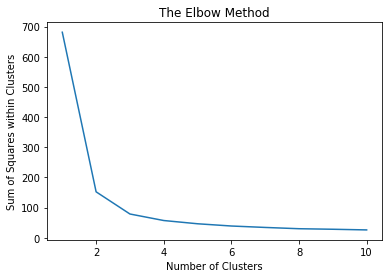

In [10]:
# Find out the optimum number of clusters for K-Means clustering and determine the K value

# Find out the optimum number of clusters for K-Means clustering
# Store the sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) into x
x = iris_df.iloc[:, [0, 1, 2, 3]].values
# List used to store the within cluster sum of squares
sumofsqaure_cluster = []
# Loop to iterate from number of clusters k = 1 to 11
for i in range(1, 11):
    # Prepare the kmeans model for k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    # Fit the model for independent variables
    kmeans.fit(x)
    # Store the sum of squares into list for every cluster value from 1 to 11
    sumofsqaure_cluster.append(kmeans.inertia_)
    
# Plot the graph between number of clusters & sum of sqaures
# to observe the where the elbow occurred
plt.plot(range(1, 11), sumofsqaure_cluster)
# Assign title to plot
plt.title('The Elbow Method')
# Assign x lable
plt.xlabel('Number of Clusters')
# Assign y lable
plt.ylabel('Sum of Squares within Clusters')
# Show the plot
plt.show()

In [11]:
# Now apply the number of clusters K = 3 & prepare the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# Predict the type of flower kmeans classifier
y_kmeans = kmeans.fit_predict(x)

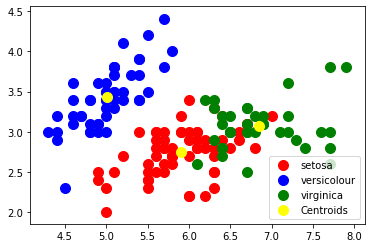

In [12]:
# Now visualize the clusters on plot
# First cluster for setosa
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
# First cluster for versicolour
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'versicolour')
# First cluster for virginica
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')
# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
# Assign the legends
plt.legend()